# 주제1 : 탈잉의 엠마 튜터 수강후기에서 가장 많이 사용된 단어는 무엇일까?

----------

## 1.1 데이터셋 정보
    - 탈잉의 엠마 튜터 수강후기 페이지에서 수강생들의 후기를 웹 스크래핑으로 수집한 데이터
- 데이터 출처 : 'https://taling.me/vod/review/33574'

In [ ]:
# 웹 스크래핑 코드


# import time
# from selenium import webdriver
# import csv

# driver = webdriver.Chrome('/Users/jade/Documents/codeit/web_automation/chromedriver')
# driver.get('https://taling.me/vod/review/33574')

# reviews = [['review']]
# for page in range(51):
#     review = driver.find_elements_by_css_selector('div.cont > p')

#     for i in range(len(review)):
#         arr = []
#         print(review[i].text)
#         arr.append(review[i].text)
#         reviews.append(arr)

#     if page <= 49:
#         driver.find_element_by_css_selector('a.page.r').click()
#         time.sleep(3)


# csv_file = open('taling_review.csv', 'w', newline='')
# csv_writer = csv.writer(csv_file)

# for i in reviews:
#     csv_writer.writerow(i)

# csv_file.close()

# driver.quit()

## 1.2 프로젝트 목표
    - 수강후기에서 가장 많이 사용된 단어들을 워드 클라우드로 시각화함으로써 수강생들의 반응 파악하기

---

## 1.3 데이터셋 준비

In [ ]:
# matplotlib에서 한글 폰트를 사용하기 위한 코드

import matplotlib as mpl
import matplotlib.pyplot as plt
 
%config InlineBackend.figure_format = 'retina'
 
!apt -qq -y install fonts-nanum
 
import matplotlib.font_manager as fm
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
mpl.font_manager._rebuild()

The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 40 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Selecting previously unselected package fonts-nanum.
(Reading database ... 160837 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20170925-1_all.deb ...
Unpacking fonts-nanum (20170925-1) ...
Setting up fonts-nanum (20170925-1) ...
Processing triggers for fontconfig (2.12.6-0ubuntu2) ...


In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('taling_review.csv')

In [ ]:
df

,review
0,엠마샘 강의 너무 좋아요^^딸에게도 소개해줘서 강의 듣고 있답니다.출근길마다 차에서...
1,결제 해야 하기에 정말 도움되는 내용이 있을까 한참 고민하다 속는셈치고 강의를 들어...
2,첫 강의를 들었고 업그레이드 버전 강의를 하신다고 해서 망설임 없이 수강했어요! 처...
3,다른 인스타마케팅 수업도 많이 들어봤지만\n혹시나 싶은 마음에 들어본 엠마쌤 수업!...
4,솔직히 처음에는 그래봐야 뭐얼마나 정보를 주겠어 했지만 뒤로갈수록 진짜 몰랐던 사실...
...,...
1103,쌤이 하시는 수업 두 개 다 듣고~~\n이번에 온라인 영상 강의까지 신청했습니다ㅎㅎ...
1104,이 수업 들을만한가?싶어 궁금해서 후기 눌러보신 분이라면\n무조건 추천드려요!!\n...
1105,오프라인 수업 들었었는데 그때도 너무 좋았어서 심화수업 나오면 신청할까 했었는데 인...
1106,NaN


## 1.4 불필요한 데이터 제거와 분포 확인

In [ ]:
print(df.isnull().sum())

review    102
dtype: int64


In [ ]:
print(df['review'].nunique())

1006


In [ ]:
df.drop_duplicates(subset=['review'], inplace=True)

In [ ]:
df = df.dropna(axis=0)

In [ ]:
len(df)

1006

## 1.5 형태소 분석과 불용어 제거

In [ ]:
!pip install konlpy

     |████████████████████████████████| 19.4MB 1.3MB/s 
     |████████████████████████████████| 92kB 14.3MB/s 
     |████████████████████████████████| 450kB 37.9MB/s 
  Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3


In [ ]:
from konlpy.tag import Okt

In [ ]:
tokenizer = Okt()

In [ ]:
text = df['review'][0]
text

'엠마샘 강의 너무 좋아요^^딸에게도 소개해줘서 강의 듣고 있답니다.출근길마다 차에서 엠마샘과 늘 함께 했지요^^강의시간이 10분 내외라 딱 좋은것 같구요.어떻게 운영해야하는지 이제 길이 보이는것 같아요 감사합니다'

In [ ]:
print(tokenizer.nouns(text))

['엠마', '샘', '강의', '딸', '소개', '강의', '출근길', '차', '엠마', '샘', '늘', '강의', '시간', '내외', '것', '운영', '이제', '길이']


In [ ]:
df['tokenized'] = df['review'].apply(tokenizer.nouns)
df

,review,tokenized
0,엠마샘 강의 너무 좋아요^^딸에게도 소개해줘서 강의 듣고 있답니다.출근길마다 차에서...,"[엠마, 샘, 강의, 딸, 소개, 강의, 출근길, 차, 엠마, 샘, 늘, 강의, 시..."
1,결제 해야 하기에 정말 도움되는 내용이 있을까 한참 고민하다 속는셈치고 강의를 들어...,"[결제, 정말, 도움, 내용, 한참, 고민, 속, 셈, 강의, 수록, 귀, 쏙쏙, ..."
2,첫 강의를 들었고 업그레이드 버전 강의를 하신다고 해서 망설임 없이 수강했어요! 처...,"[첫, 강의, 업그레이드, 버전, 강의, 수강, 처음, 부터, 끝, 꿀팁, 전, 열..."
3,다른 인스타마케팅 수업도 많이 들어봤지만\n혹시나 싶은 마음에 들어본 엠마쌤 수업!...,"[다른, 인스타, 마케팅, 수업, 혹시, 마음, 엠마, 쌤, 수업, 수업, 비교, ..."
4,솔직히 처음에는 그래봐야 뭐얼마나 정보를 주겠어 했지만 뒤로갈수록 진짜 몰랐던 사실...,"[처음, 뭐, 얼마나, 정보, 뒤, 갈수록, 진짜, 사실, 정보, 팔로워, 반응, ..."
...,...,...
1099,교육관련 일을 하면서 교육은 비즈니스라는 인식을 하지 못했었어요. 강의가 괜찮고 컨...,"[교육, 관련, 일, 교육, 비즈니스, 인식, 강의, 컨텐츠, 팔로워, 년, 인스타..."
1102,"다른 강의에서 엠마님의 친절하면서 정성스런 강의 준비와 진행, qna까지 보고나서 ...","[다른, 강의, 엠마, 강의, 준비, 진행, 인스타, 강의, 날, 엠마, 강의, 막..."
1103,쌤이 하시는 수업 두 개 다 듣고~~\n이번에 온라인 영상 강의까지 신청했습니다ㅎㅎ...,"[쌤, 수업, 두, 개, 이번, 온라인, 영상, 강의, 신청, 엠마, 쌤, 수업, ..."
1104,이 수업 들을만한가?싶어 궁금해서 후기 눌러보신 분이라면\n무조건 추천드려요!!\n...,"[이, 수업, 후기, 보신, 무조건, 추천, 말로, 마케팅, 강의, 한번, 속, 보..."


In [ ]:
df['tokenized'] = df['tokenized'].apply(lambda x: [item for item in x if len(item) > 1])
df['tokenized']

0       [엠마, 강의, 소개, 강의, 출근길, 엠마, 강의, 시간, 내외, 운영, 이제, 길이]
1       [결제, 정말, 도움, 내용, 한참, 고민, 강의, 수록, 쏙쏙, 강의, 지금, 정...
2       [강의, 업그레이드, 버전, 강의, 수강, 처음, 부터, 꿀팁, 열정, 영상, 감탄...
3       [다른, 인스타, 마케팅, 수업, 혹시, 마음, 엠마, 수업, 수업, 비교, 불가,...
4       [처음, 얼마나, 정보, 갈수록, 진짜, 사실, 정보, 팔로워, 반응, 크게, 점점...
                              ...                        
1099    [교육, 관련, 교육, 비즈니스, 인식, 강의, 컨텐츠, 팔로워, 인스타, 컨텐츠,...
1102    [다른, 강의, 엠마, 강의, 준비, 진행, 인스타, 강의, 엠마, 강의, 일도, ...
1103    [수업, 이번, 온라인, 영상, 강의, 신청, 엠마, 수업, 항상, 때문, 이번, ...
1104    [수업, 후기, 보신, 무조건, 추천, 말로, 마케팅, 강의, 한번, 보신, 진짜,...
1105    [오프라인, 수업, 그때, 심화, 수업, 신청, 인강, 바로, 반절, 정도, 리뷰,...
Name: tokenized, Length: 1006, dtype: object

## 1.6 단어의 빈도수 파악

In [ ]:
import numpy as np

In [ ]:
total_reviews = np.hstack(df['tokenized'].values)

In [ ]:
print(total_reviews)

['엠마' '강의' '소개' ... '그때' '코칭' '튜터님']


In [ ]:
print(len(total_reviews))

16517


In [ ]:
from collections import Counter

In [ ]:
review_word_count = Counter(total_reviews)
print(review_word_count.most_common(20))

[('강의', 1113), ('인스타', 552), ('엠마', 539), ('수업', 498), ('인스타그램', 298), ('정말', 282), ('생각', 236), ('도움', 222), ('내용', 201), ('팔로워', 197), ('계정', 185), ('완강', 164), ('시작', 160), ('하나', 159), ('부분', 154), ('수강', 125), ('다시', 122), ('설명', 109), ('이제', 108), ('고민', 107)]


## 1.7 워드 클라우드로 시각화

### 1.7.1 빈도수만 반영하여 워드 클라우드 만들기

In [ ]:
from wordcloud import WordCloud

In [ ]:
df.tokenized.reset_index(drop=True)

0       [엠마, 강의, 소개, 강의, 출근길, 엠마, 강의, 시간, 내외, 운영, 이제, 길이]
1       [결제, 정말, 도움, 내용, 한참, 고민, 강의, 수록, 쏙쏙, 강의, 지금, 정...
2       [강의, 업그레이드, 버전, 강의, 수강, 처음, 부터, 꿀팁, 열정, 영상, 감탄...
3       [다른, 인스타, 마케팅, 수업, 혹시, 마음, 엠마, 수업, 수업, 비교, 불가,...
4       [처음, 얼마나, 정보, 갈수록, 진짜, 사실, 정보, 팔로워, 반응, 크게, 점점...
                              ...                        
1001    [교육, 관련, 교육, 비즈니스, 인식, 강의, 컨텐츠, 팔로워, 인스타, 컨텐츠,...
1002    [다른, 강의, 엠마, 강의, 준비, 진행, 인스타, 강의, 엠마, 강의, 일도, ...
1003    [수업, 이번, 온라인, 영상, 강의, 신청, 엠마, 수업, 항상, 때문, 이번, ...
1004    [수업, 후기, 보신, 무조건, 추천, 말로, 마케팅, 강의, 한번, 보신, 진짜,...
1005    [오프라인, 수업, 그때, 심화, 수업, 신청, 인강, 바로, 반절, 정도, 리뷰,...
Name: tokenized, Length: 1006, dtype: object

In [ ]:
np.concatenate(df.tokenized.reset_index(drop=True))

array(['엠마', '강의', '소개', ..., '그때', '코칭', '튜터님'], dtype='<U32')

In [ ]:
temp_data = ' '.join(np.concatenate(df.tokenized.reset_index(drop=True)))
temp_data

'엠마 강의 소개 강의 출근길 엠마 강의 시간 내외 운영 이제 길이 결제 정말 도움 내용 한참 고민 강의 수록 쏙쏙 강의 지금 정리 도움 강의 업그레이드 버전 강의 수강 처음 부터 꿀팁 열정 영상 감탄 기억 과연 생각 먼저 앞서 다른 수강생 성공사례 번만 보고 반복 하루 엠마 다른 인스타 마케팅 수업 혹시 마음 엠마 수업 수업 비교 불가 내용 고민 라면 수업 신청 추천 처음 얼마나 정보 갈수록 진짜 사실 정보 팔로워 반응 크게 점점 유입 무엇 인스타 분석 능력 된거 친구 추천 경험 바탕 강의 분석 전문 내용 숙제 있쯉니 강의 죠아 헤헤 이제 인스타 공부 시작 처음 엠마 적용 도움 수업 신청 이제 시작 내용 하나 매일 영상 시간 영상 접목 의지 엠마 시크릿 강의 널리 전수 자료 다운 카톡 비번 전달 카톡 자료 비번 어디 문의 탈잉입니 강의 자료 경우 아래 경로 통해 확인 수강 목록 오디 해당 강의 선택 강의실 입장 하단 강의 자료 마이 탈잉 오디 수강 목록 해당 강의 강의 소개 강의실 입장 강의 자료 가기 경로 자료 비번 카톡 카톡 대화 비번 어쩌 비번 다시 카톡 아이디 수업 처음 쏙쏙 지금 반정 수강 깨알 꿀팁 엠마 강의 통해 인스타 인스타그램 인지 접근 인사이트 실천 하나 모두 실천 인스타그램 성공 발판 오늘 시작 강의 설명 보기 엠마 강의 고민 고민 한번 추천 정말 과제 강의 실전 스킬 강의 인스타 민가 한번 탈잉 전체 인기 강사 바로 세로 식당 주방 가르침 자신 수업 내용 전달 감동 며칠 강의 나름 방향성 개선 무엇 정말 용기 생기 감사 인스타 강의 계속 엠마 전후 리뉴얼 강의 업데이트 주저 수강신청 영상 복습 한번 엠마 긍정 에너지 항상 강의 가르침 계속 선생님 엠마 먼저 강의 용이 크게 도움 진짜 고민 수강신청 수업 책보 상세 꿀팁 거의 인스타그램 대한 부터 과외 생각 진짜 강의 만족 고민 강추 필요 엠마 강의 강의 덕후 강의 준비 체계 수업 지인 추천 정말 커피 정도 엠마 다른 수업 수업 만들기 엠마 대한 무한 신뢰 인스타그램 개인 고민 웬걸 내용 

(-0.5, 1599.5, 799.5, -0.5)

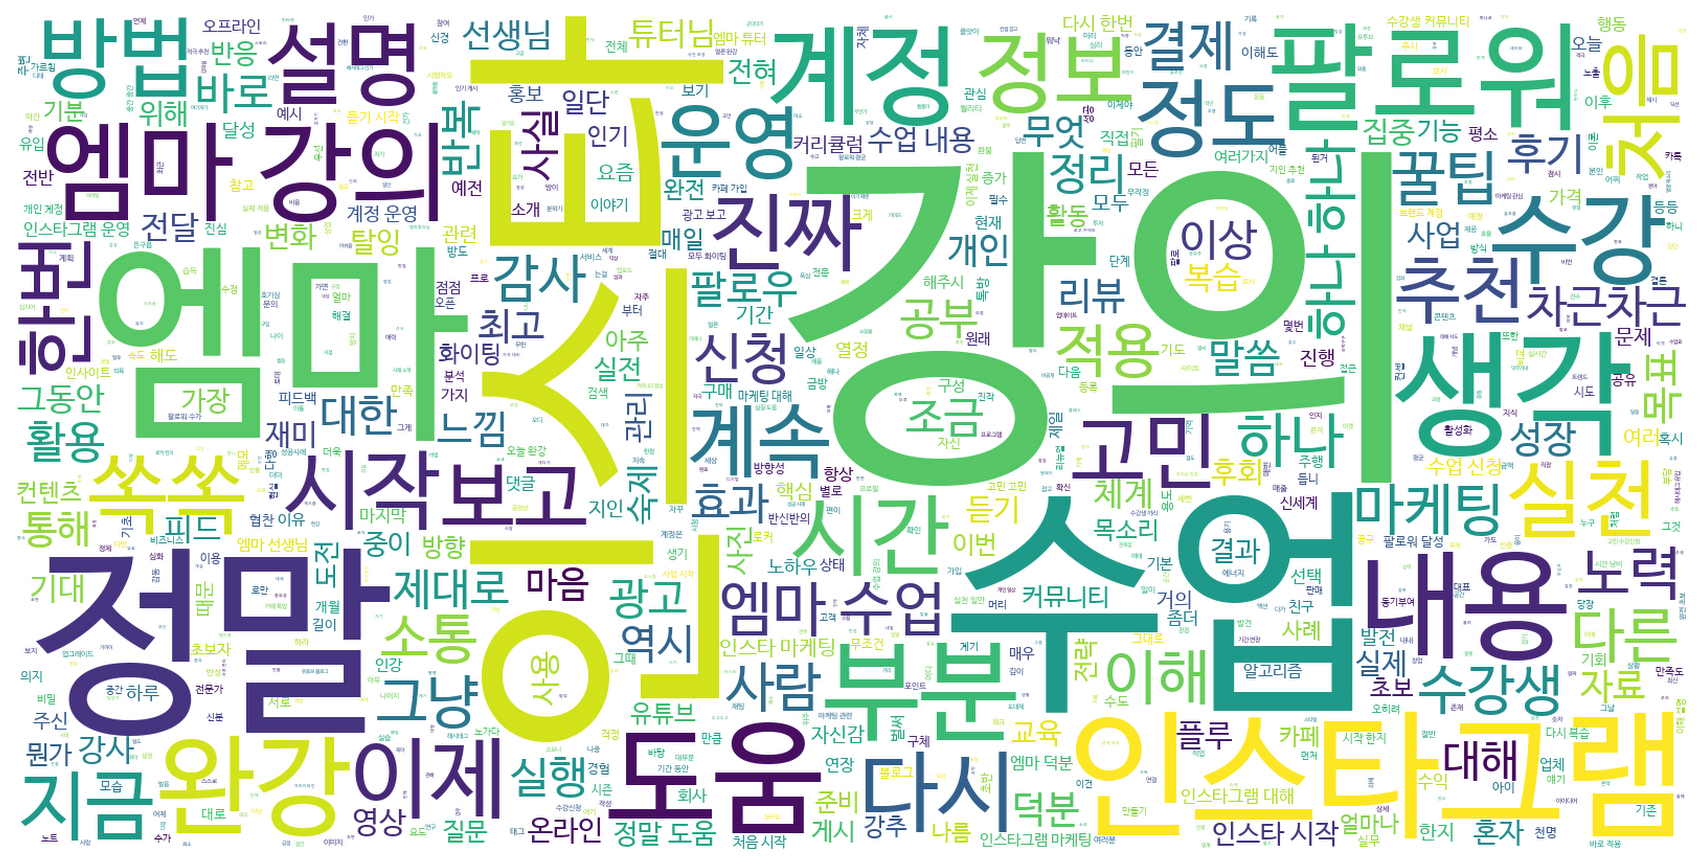

In [ ]:
plt.figure(figsize = (15,15))
temp_data = ' '.join(np.concatenate(df.tokenized.reset_index(drop=True)))
wc = WordCloud(background_color='white', max_words = 2000 , width = 1600 , height = 800, font_path = fontpath).generate(temp_data)
plt.imshow(wc, interpolation = 'lanczos')
plt.axis('off')

### 1.7.2 불용어를 재구성하고 워드 클라우드 만들기

In [ ]:
# 유의미한 워드클라우드를 위해 형태소가 잘못 분리된 단어 또는 긍정/부정을 의미한다고 보기 어려운 부사어나 감탄사,
# 그리고 언급되는 것이 당연한(엠마, 인스타그램, 강의, 수업 등) 단어들을 불용어 사전에 포함 

stop_words = ['역시', '전혀', '대한', '정말', '아주', '보고', '정도', '위해', '대해', '이상', 
              '중이', '화이팅', '덕분', '튜터님', '이번', '그냥', '주신', '한지', '혹시', '플루', 
              '그동안', '뭔가', '이제', '부터', '번만', '탈잉입니', '오디', '민가', '크게', '웬걸', 
              '수록', '갈수록', '점점', '다른', '일도', '때문', '그때', '진짜', '얼마나', '무엇',
              '인스타', '인스타그램', '수업', '강의', '엠마', '부분', '엠마 강의', '다시', '듣기', '생기']
len(stop_words)

50

In [ ]:
df['tokenized'] = df['tokenized'].apply(lambda x: [item for item in x if item not in stop_words and len(item) > 1])
df['tokenized']

0                               [소개, 출근길, 시간, 내외, 운영, 길이]
1                    [결제, 도움, 내용, 한참, 고민, 쏙쏙, 지금, 정리, 도움]
2       [업그레이드, 버전, 수강, 처음, 꿀팁, 열정, 영상, 감탄, 기억, 과연, 생각...
3                   [마케팅, 마음, 비교, 불가, 내용, 고민, 라면, 신청, 추천]
4       [처음, 정보, 사실, 정보, 팔로워, 반응, 유입, 분석, 능력, 된거, 친구, 추천]
                              ...                        
1099    [교육, 관련, 교육, 비즈니스, 인식, 컨텐츠, 팔로워, 컨텐츠, 시간, 가도, ...
1102    [준비, 진행, 신청, 블로그, 운영, 페북, 이미지, 승부, 자꾸, 멀리, 예전,...
1103    [온라인, 영상, 신청, 항상, 인강, 기대, 신청, 기대, 내용, 영상, 오프라인...
1104    [후기, 보신, 무조건, 추천, 말로, 마케팅, 한번, 보신, 실무, 자의, 공략,...
1105    [오프라인, 심화, 신청, 인강, 바로, 반절, 리뷰, 튜터, 마케팅, 유튜브, 정...
Name: tokenized, Length: 1006, dtype: object

In [ ]:
total_reviews = np.hstack(df['tokenized'].values)

In [ ]:
print(len(total_reviews))

11700


In [ ]:
review_word_count = Counter(total_reviews)
print(review_word_count.most_common(20))

[('생각', 236), ('도움', 222), ('내용', 201), ('팔로워', 197), ('계정', 185), ('완강', 164), ('시작', 160), ('하나', 159), ('수강', 125), ('설명', 109), ('고민', 107), ('마케팅', 107), ('운영', 106), ('실천', 106), ('시간', 104), ('쏙쏙', 97), ('처음', 97), ('정보', 96), ('방법', 95), ('한번', 93)]


In [ ]:
df.tokenized.reset_index(drop=True)

0                               [소개, 출근길, 시간, 내외, 운영, 길이]
1                    [결제, 도움, 내용, 한참, 고민, 쏙쏙, 지금, 정리, 도움]
2       [업그레이드, 버전, 수강, 처음, 꿀팁, 열정, 영상, 감탄, 기억, 과연, 생각...
3                   [마케팅, 마음, 비교, 불가, 내용, 고민, 라면, 신청, 추천]
4       [처음, 정보, 사실, 정보, 팔로워, 반응, 유입, 분석, 능력, 된거, 친구, 추천]
                              ...                        
1001    [교육, 관련, 교육, 비즈니스, 인식, 컨텐츠, 팔로워, 컨텐츠, 시간, 가도, ...
1002    [준비, 진행, 신청, 블로그, 운영, 페북, 이미지, 승부, 자꾸, 멀리, 예전,...
1003    [온라인, 영상, 신청, 항상, 인강, 기대, 신청, 기대, 내용, 영상, 오프라인...
1004    [후기, 보신, 무조건, 추천, 말로, 마케팅, 한번, 보신, 실무, 자의, 공략,...
1005    [오프라인, 심화, 신청, 인강, 바로, 반절, 리뷰, 튜터, 마케팅, 유튜브, 정...
Name: tokenized, Length: 1006, dtype: object

In [ ]:
np.concatenate(df.tokenized.reset_index(drop=True))

array(['소개', '출근길', '시간', ..., '조만간', '질문', '코칭'], dtype='<U32')

(-0.5, 1599.5, 799.5, -0.5)

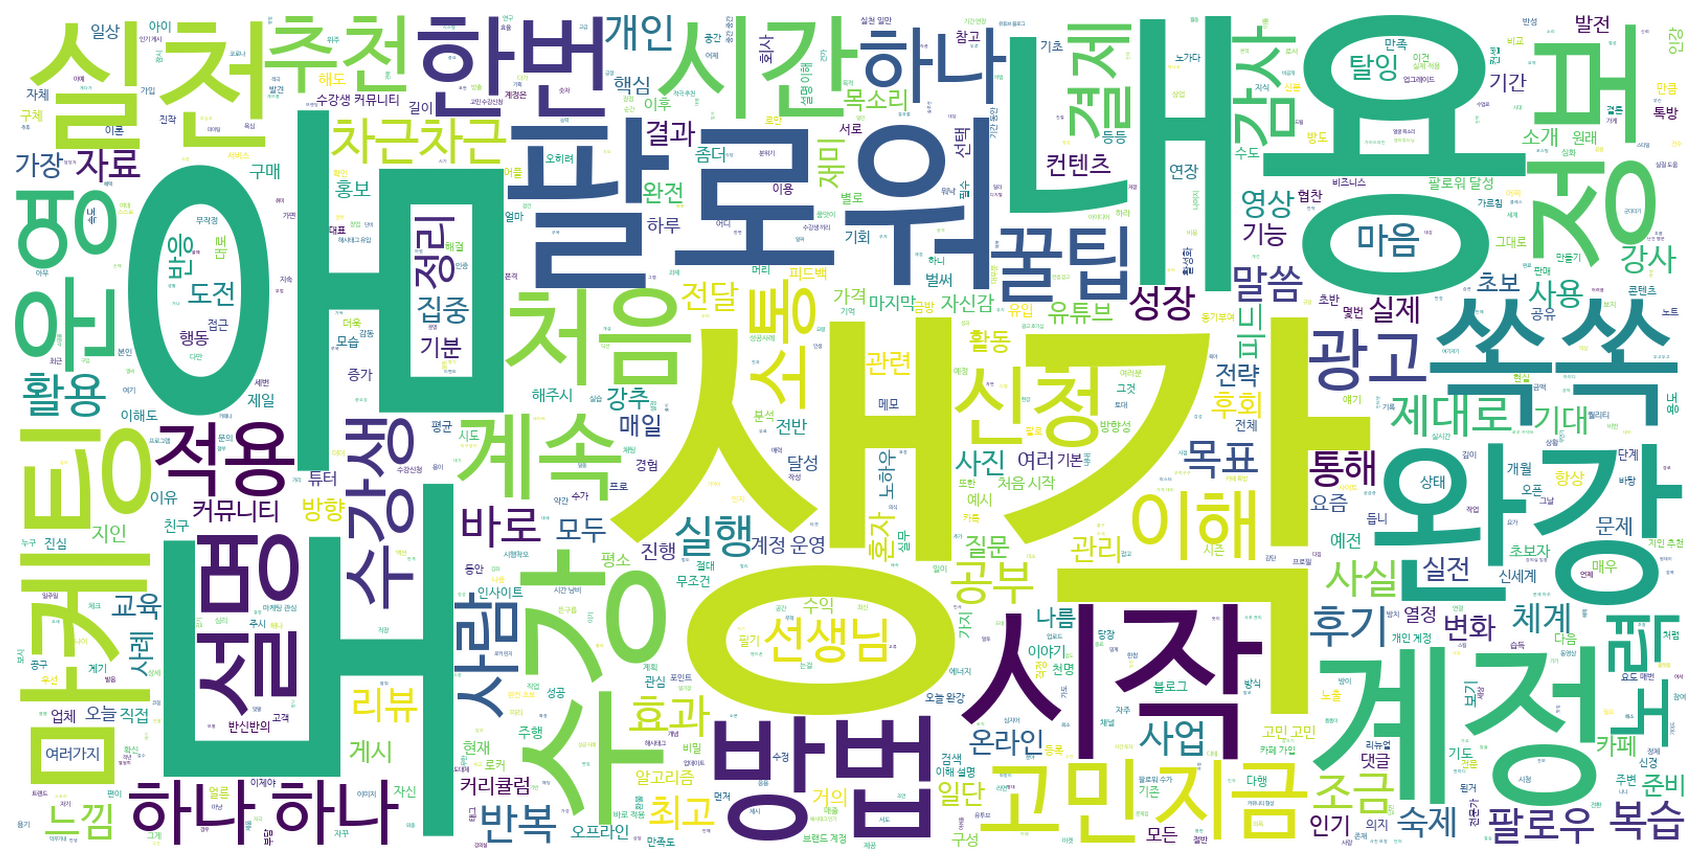

In [ ]:
plt.figure(figsize = (15,15))
temp_data = ' '.join(np.concatenate(df.tokenized.reset_index(drop=True)))
wc = WordCloud(background_color='white', max_words = 2000 , width = 1600 , height = 800, font_path = fontpath).generate(temp_data)
plt.imshow(wc, interpolation = 'lanczos')
plt.axis('off')

## 1.8 데이터 분석 결과 정리
-----

    - 워드 클라우드로 수강후기를 시각화한 결과, 1006개의 수강 후기에서 긍정적인 의미의 단어들이 압도적으로 많이 사용되었습니다.
    - '완강'이라는 단어가 자주 사용된 것으로 보았을 때, 엠마 튜터의 인스타그램 강의는 중간에 포기하지 않고 끝까지 수강한 수강생이 많았다는 것을 유추할 수 있습니다.
    - 마케팅을 목적으로 인스타그램 계정을 운영하려는 수강생들이 많으며, '팔로워'에 대한 관심이 높다는 것을 알 수 있습니다.
    - '처음', '하나 하나' 등의 단어가 사용된 것으로 보아, 인스타그램에 익숙한 사람보다는 관련 경험이 적은 수강생들이 많았을 것으로 볼 수 있습니다.
    - 업무상 인스타그램을 반드시 사용해야 하는 상황인데, 어떻게 계정을 운영해야 하는지 막막함을 느끼는 초보자들을 대상으로 마케팅 캠페인을 집행하는 것이 가장 효율적일 것으로 보입니다.